# Champion Analysis
Analysis of metrics obtained from saved champions of the various runs.

## Imports and General Setup

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from tpg.agent import Agent, loadAgent
from tpg.utils import pathDepths, actionInstructionStats, learnerInstructionStats, getLearners, getTeams
import gym
from numpy import append, clip, mean
from math import sin, cos, pi
from copy import deepcopy
from IPython import display
import matplotlib

def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Run Type')
    
ops = ["ADD", "SUB", "MULT", "DIV", "NEG", "COS"]

### Load in Champions/Agents and their 1000 Episode Results

In [2]:
gp1_agent = loadAgent("run-data/gp/1/agent.pkl")
gp2_agent = loadAgent("run-data/gp/2/agent.pkl")
gp3_agent = loadAgent("run-data/gp/3/agent.pkl") 
gp4_agent = loadAgent("run-data/gp/4/agent.pkl") # best 
gp5_agent = loadAgent("run-data/gp/5/agent.pkl")
gp_agents = [gp1_agent, gp2_agent, gp3_agent, gp4_agent, gp5_agent]

tpgsbb1_agent = loadAgent("run-data/tpgsbb/1/agent.pkl")
tpgsbb2_agent = loadAgent("run-data/tpgsbb/2/agent.pkl")
tpgsbb3_agent = loadAgent("run-data/tpgsbb/3/agent.pkl") # best
tpgsbb4_agent = loadAgent("run-data/tpgsbb/4/agent.pkl")
tpgsbb5_agent = loadAgent("run-data/tpgsbb/5/agent.pkl")
tpgsbb_agents = [tpgsbb1_agent, tpgsbb2_agent, tpgsbb3_agent, tpgsbb4_agent, tpgsbb5_agent]

# save scores over 1000 episodes
gp1 = pickle.load(open("run-data/gp/1/agent-reset-scores-2.pkl", "rb"))
gp2 = pickle.load(open("run-data/gp/2/agent-reset-scores-2.pkl", "rb"))
gp3 = pickle.load(open("run-data/gp/3/agent-reset-scores-2.pkl", "rb"))
gp4 = pickle.load(open("run-data/gp/4/agent-reset-scores-2.pkl", "rb"))
gp5 = pickle.load(open("run-data/gp/5/agent-reset-scores-2.pkl", "rb"))
gp = gp1 + gp2 + gp3 + gp4 + gp5
gps = [gp1, gp2, gp3, gp4, gp5]

tpgsbb1 = pickle.load(open("run-data/tpgsbb/1/agent-reset-scores-2.pkl", "rb"))
tpgsbb2 = pickle.load(open("run-data/tpgsbb/2/agent-reset-scores-2.pkl", "rb"))
tpgsbb3 = pickle.load(open("run-data/tpgsbb/3/agent-reset-scores-2.pkl", "rb"))
tpgsbb4 = pickle.load(open("run-data/tpgsbb/4/agent-reset-scores-2.pkl", "rb"))
tpgsbb5 = pickle.load(open("run-data/tpgsbb/5/agent-reset-scores-2.pkl", "rb"))
tpgsbb = tpgsbb1 + tpgsbb2 + tpgsbb3 + tpgsbb4 + tpgsbb5
tpgsbbs = [tpgsbb1, tpgsbb2, tpgsbb3, tpgsbb4, tpgsbb5]

## Plot of Agents' Performances

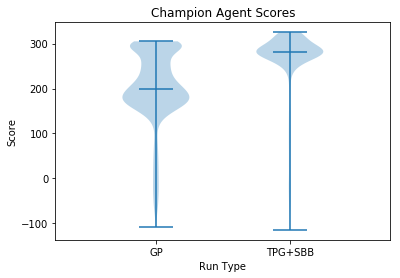

In [3]:
ax = plt.axes()

plt.violinplot((gp, tpgsbb), showmedians=True, points=5000)

plt.title("Champion Agent Scores")
plt.xlabel("Run Type")
plt.ylabel("Score")

set_axis_style(ax, ["GP", "TPG+SBB"])

plt.savefig("images/champs.pdf")
plt.show()

## Overview of Agents' Performances and Structures

### GP

In [4]:
for i in range(len(gps)):
    print(f"GP {i+1}\n")

    print("Scores:")
    print(f"Mean Score: {np.mean(gps[i])}")
    print(f"Std Score: {np.std(gps[i])}\n")

    print("Structure:")
    print(f"Act Instructions: {actionInstructionStats(getLearners(gp_agents[i].team), ops)}\n\n")

GP 1

Scores:
Mean Score: 222.5888608626568
Std Score: 85.89577708208998

Structure:
Act Instructions: {'overall': {'total': 32, 'min': 32, 'max': 32, 'avg': 32.0}, 'ADD': {'total': 6, 'min': 6, 'max': 6, 'avg': 6.0}, 'SUB': {'total': 6, 'min': 6, 'max': 6, 'avg': 6.0}, 'MULT': {'total': 5, 'min': 5, 'max': 5, 'avg': 5.0}, 'DIV': {'total': 7, 'min': 7, 'max': 7, 'avg': 7.0}, 'NEG': {'total': 3, 'min': 3, 'max': 3, 'avg': 3.0}, 'COS': {'total': 5, 'min': 5, 'max': 5, 'avg': 5.0}, 'numActPrograms': 1}


GP 2

Scores:
Mean Score: 142.56266317357625
Std Score: 96.69776455371526

Structure:
Act Instructions: {'overall': {'total': 33, 'min': 33, 'max': 33, 'avg': 33.0}, 'ADD': {'total': 4, 'min': 4, 'max': 4, 'avg': 4.0}, 'SUB': {'total': 5, 'min': 5, 'max': 5, 'avg': 5.0}, 'MULT': {'total': 10, 'min': 10, 'max': 10, 'avg': 10.0}, 'DIV': {'total': 5, 'min': 5, 'max': 5, 'avg': 5.0}, 'NEG': {'total': 4, 'min': 4, 'max': 4, 'avg': 4.0}, 'COS': {'total': 5, 'min': 5, 'max': 5, 'avg': 5.0}, 'num

### TPG+SBB

In [5]:
for i in range(len(tpgsbb_agents)):
    print(f"TPG+SBB {i+1}\n")

    print("Scores:")
    print(f"Mean Score: {np.mean(tpgsbbs[i])}")
    print(f"Std Score: {np.std(tpgsbbs[i])}\n")

    print("Structure:")
    print(f"Teams: {len(getTeams(tpgsbb_agents[i].team))}")
    print(f"Learners: {len(getLearners(tpgsbb_agents[i].team))}")
    print(f"Path Depths: {pathDepths(tpgsbb_agents[i].team)}")

    print(f"\nBid Instructions: {learnerInstructionStats(getLearners(tpgsbb_agents[i].team), ops)}")
    print(f"\nAct Instructions: {actionInstructionStats(getLearners(tpgsbb_agents[i].team), ops)}\n\n")

TPG+SBB 1

Scores:
Mean Score: 230.91848998285917
Std Score: 100.12648432386825

Structure:
Teams: 6
Learners: 12
Path Depths: [1, 2, 3, 4, 5, 6]

Bid Instructions: {'overall': {'total': 366, 'min': 15, 'max': 57, 'avg': 30.5}, 'ADD': {'total': 56, 'min': 1, 'max': 9, 'avg': 4.666666666666667}, 'SUB': {'total': 72, 'min': 3, 'max': 12, 'avg': 6.0}, 'MULT': {'total': 57, 'min': 0, 'max': 9, 'avg': 4.75}, 'DIV': {'total': 58, 'min': 0, 'max': 9, 'avg': 4.833333333333333}, 'NEG': {'total': 62, 'min': 3, 'max': 9, 'avg': 5.166666666666667}, 'COS': {'total': 61, 'min': 2, 'max': 11, 'avg': 5.083333333333333}}

Act Instructions: {'overall': {'total': 294, 'min': 7, 'max': 50, 'avg': 24.5}, 'ADD': {'total': 54, 'min': 1, 'max': 13, 'avg': 4.5}, 'SUB': {'total': 50, 'min': 0, 'max': 12, 'avg': 4.166666666666666}, 'MULT': {'total': 58, 'min': 1, 'max': 10, 'avg': 4.833333333333333}, 'DIV': {'total': 38, 'min': 2, 'max': 8, 'avg': 3.166666666666667}, 'NEG': {'total': 41, 'min': 1, 'max': 9, 'avg

## Get Agent Runtime Metrics

### Do Runs and Set Up Data Fields

In [6]:
"""
Check out some metrics of Agents actions during a run.
"""

def agent_paths(agent, frames=99999):

    env = gym.make("BipedalWalker-v3")
    team_learner_visits_ids = {}
    
    paths = []

    agent.configFunctionsSelf()
    agent.zeroRegisters()

    state = env.reset()
    score = 0

    for i in range(frames):

        state = append(state, [2*sin(0.2*pi*i), 2*cos(0.2*pi*i),
                            2*sin(0.1*pi*i), 2*cos(0.1*pi*i),
                            2*sin(0.05*pi*i), 2*cos(0.05*pi*i)])

        trace = {}

        act = agent.act(state, path_trace=trace)[1]
        act = clip(act, -1, 1)

        # feedback from env
        state, reward, is_done, _ = env.step(act)
        score += reward
        
        paths.append(deepcopy(trace))

        if is_done:
            break # end early if losing state

    env.close()
    
    print("Score: ", score)
    print("Total frames: ", i)
    
    return paths


In [7]:
print("GP:")
gp_paths = agent_paths(gp4_agent)

# gp stats
gp_times = []
gp_actions = []
gp_n_act_instructions = []

# save dict of learners by id
gp_lrnr = getLearners(gp4_agent.team)[0]


print("TPG+SBB:")
tpgsbb_paths = agent_paths(tpgsbb3_agent)

# tpgsbb stats
tpgsbb_times = []
tpgsbb_actions = []
tpgsbb_teams_vis = []
tpgsbb_learners_vis = []
tpgsbb_n_teams_vis = []
tpgsbb_n_learners_vis = []
tpgsbb_n_instructions = []
tpgsbb_n_act_instructions = []

# save dict of learners by id
tpgsbb_lrnrs = {}
for lrnr in getLearners(tpgsbb3_agent.team):
    tpgsbb_lrnrs[str(lrnr.id)] = lrnr

GP:


/home/ryan/anaconda3/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Score:  297.6228920016497
Total frames:  1382
TPG+SBB:


/home/ryan/anaconda3/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Score:  281.08279525186254
Total frames:  1574


### Get the Data

In [8]:
# get data from gp path
for path in gp_paths:
    gp_times.append(path["execution_time"])
    gp_actions.append(clip(path["final_action"][1], -1, 1))
    gp_n_act_instructions.append(len(
        gp_lrnr.actionObj.program.instructions))

# get data from tpg+sbb path
for path in tpgsbb_paths:
    tpgsbb_times.append(path["execution_time"])
    tpgsbb_actions.append(clip(path["final_action"][1], -1, 1))
    tpgsbb_teams_vis.append([])
    tpgsbb_learners_vis.append([])
    tpgsbb_n_instructions.append(0)
    
    for team_visit in path["path"]:
        tpgsbb_teams_vis[-1].append(team_visit["team_id"])
        
        for learner_visit in team_visit["bids"]:
            tpgsbb_learners_vis[-1].append(learner_visit["learner_id"])
            tpgsbb_n_instructions[-1] += len(
                tpgsbb_lrnrs[learner_visit["learner_id"]].program.instructions)
    
    
    tpgsbb_n_teams_vis.append(len(tpgsbb_teams_vis[-1]))
    tpgsbb_n_learners_vis.append(len(tpgsbb_learners_vis[-1]))
    tpgsbb_n_act_instructions.append(len(
        tpgsbb_lrnrs[path["path"][-1]["top_learner"]]
            .actionObj.program.instructions))

## Analyze Observation Space Usage in Programs

In [9]:
obs_labels = ["Hull Angle", "Hull Ang. Vel.", "Velocity X",
              "Velocity Y", "Hip 1 Angle", "Hip 1 Speed", 
              "Knee 1 Angle", "Knee 1 Speed", "Leg 1 Contact", 
              "Hip 2 Angle", "Hip 2 Speed", "Knee 2 Angle",
              "Knee 2 Speed", "Leg 2 Contact", "Lidar 1", "Lidar 2",
              "Lidar 3", "Lidar 4", "Lidar 5", "Lidar 6", "Lidar 7",
              "Lidar 8", "Lidar 9", "Lidar 10", "Sin / 5", "Cos / 5",
              "Sin / 10", "Cos / 10", "Sin / 20", "Cos / 20"]

src_to_obs = {}
for i in range(len(obs_labels)):
    src_to_obs[i] = obs_labels[i]
    
# get all data in numeric array form for visualization
all_obs_data = []

"""GP observation data"""

# set up counts dict
gp_counts = {}
for key in src_to_obs.keys():
    gp_counts[src_to_obs[key]] = 0

# add instructions to counts
instructions = gp_lrnr.actionObj.program.instructions
for instruction in instructions:
    gp_counts[src_to_obs[instruction[3]]] += 1 / len(instructions)
    
all_obs_data.append([])
for label in obs_labels:
    all_obs_data[-1].append(gp_counts[label])
    
print("GP Observation Space Uses:\n", gp_counts, "\n")

"""TPG+SBB observation data"""

# get actually used bid and act learners
tpgsbb_bid_learners = set()
tpgsbb_act_learners = set()
for l_list in tpgsbb_learners_vis:
    for l in l_list:
        tpgsbb_bid_learners.add(l)
    tpgsbb_act_learners.add(l_list[-1])

# set up counts dicts
tpgsbb_bid_counts = {}
tpgsbb_act_counts = {}
for key in src_to_obs.keys():
    tpgsbb_bid_counts[src_to_obs[key]] = 0
    tpgsbb_act_counts[src_to_obs[key]] = 0

# get the counts
for l in tpgsbb_bid_learners:
    instructions = tpgsbb_lrnrs[str(l)].program.instructions
    for instruction in instructions:
        tpgsbb_bid_counts[src_to_obs[instruction[3]]] += 1/len(tpgsbb_bid_learners)/len(instructions)
        
for l in tpgsbb_act_learners:
    instructions = tpgsbb_lrnrs[str(l)].program.instructions
    for instruction in instructions:
        tpgsbb_act_counts[src_to_obs[instruction[3]]] += 1/len(tpgsbb_act_learners)/len(instructions)
        
all_obs_data.append([])
for label in obs_labels:
    all_obs_data[-1].append(tpgsbb_bid_counts[label])
    
all_obs_data.append([])
for label in obs_labels:
    all_obs_data[-1].append(tpgsbb_act_counts[label])
    
print("TPG+SBB Bid Observation Space Uses:\n", tpgsbb_bid_counts, "\n")
print("TPG+SBB Act Observation Space Uses:\n", tpgsbb_act_counts)

all_obs_data = np.flip(np.array(all_obs_data), axis=0)

GP Observation Space Uses:
 {'Hull Angle': 0.05555555555555555, 'Hull Ang. Vel.': 0.06944444444444445, 'Velocity X': 0.041666666666666664, 'Velocity Y': 0.041666666666666664, 'Hip 1 Angle': 0.05555555555555555, 'Hip 1 Speed': 0.013888888888888888, 'Knee 1 Angle': 0, 'Knee 1 Speed': 0.05555555555555555, 'Leg 1 Contact': 0.013888888888888888, 'Hip 2 Angle': 0.08333333333333334, 'Hip 2 Speed': 0.027777777777777776, 'Knee 2 Angle': 0, 'Knee 2 Speed': 0.041666666666666664, 'Leg 2 Contact': 0.013888888888888888, 'Lidar 1': 0.027777777777777776, 'Lidar 2': 0.013888888888888888, 'Lidar 3': 0.013888888888888888, 'Lidar 4': 0.027777777777777776, 'Lidar 5': 0.027777777777777776, 'Lidar 6': 0.013888888888888888, 'Lidar 7': 0.027777777777777776, 'Lidar 8': 0.08333333333333334, 'Lidar 9': 0, 'Lidar 10': 0.041666666666666664, 'Sin / 5': 0.013888888888888888, 'Cos / 5': 0.027777777777777776, 'Sin / 10': 0.05555555555555555, 'Cos / 10': 0.027777777777777776, 'Sin / 20': 0.027777777777777776, 'Cos / 20'

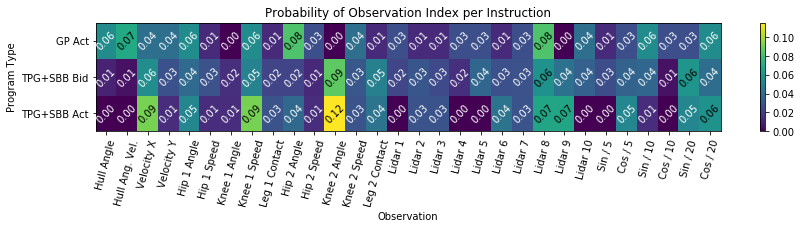

In [10]:
plt.figure(figsize=(14,2))

hm = plt.pcolor(all_obs_data)

plt.xticks(np.arange(len(obs_labels))+0.5, rotation=75)
hm.axes.set_xticklabels(obs_labels)

plt.yticks(np.arange(len(all_obs_data))+0.5, rotation=0)
hm.axes.set_yticklabels(["TPG+SBB Act", "TPG+SBB Bid", 
                         "GP Act"])

for row in range(len(range(3))):
    for col in range(len(obs_labels)):
        if all_obs_data[row][col] > np.max(all_obs_data)/2:
            plt.text(col+0.5, row+0.5, '%.2f' % all_obs_data[row][col],
                 ha='center', va='center', color="black",
                    rotation=45)
        else:
            plt.text(col+0.5, row+0.5, '%.2f' % all_obs_data[row][col],
                     ha='center', va='center', color="white",
                    rotation=45)

plt.colorbar(hm)

plt.xlabel("Observation")
plt.ylabel("Program Type")
plt.title("Probability of Observation Index per Instruction")

plt.show()

## Plots of Actions and Learners used over Time

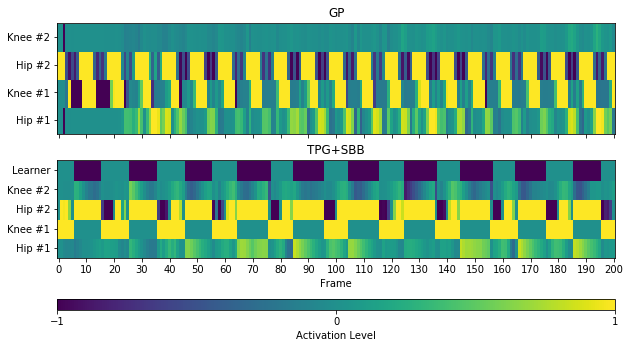

In [11]:
"""
Plot actions made over time, and what learner made that action.
"""

fig, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(10,6))

"""
GP
"""

action_pixels = np.repeat(np.array(gp_actions).T, (10,10,10,10), axis=0)[:,:201]

ax1.imshow(action_pixels)
ax1.set_yticks([5, 15, 25, 35])
ax1.set_ylim(0,40)
ax1.set_yticklabels(["Hip #1", "Knee #1", "Hip #2", "Knee #2"])
ax1.set_title("GP")
ax1.set_xticks([])

"""
TPG+SBB
"""

# get all the learners that made an action each step
action_learners = []
al_uniques = set()
for al_list in tpgsbb_learners_vis:
    action_learners.append(al_list[-1])
    al_uniques.add(al_list[-1])
    
action_learners = np.array(action_learners)
# convert learner ids to value on heatmap
for i, al in enumerate(al_uniques):
    action_learners = np.where(action_learners==al, 
        ((i/len(al_uniques))*2)-1,
        action_learners)
    
# make numeric
action_learners = np.array(action_learners, dtype=float)

# put together pixels from actions and learner selection
action_pixels = np.repeat(
    np.concatenate((np.array(tpgsbb_actions).T, (action_learners,))), 
    (10,10,10,10,10), axis=0)[:,:201]

img = ax2.imshow(action_pixels, aspect="auto")
cb = fig.colorbar(img, ticks=[-1,0,1], orientation="horizontal",
                 aspect=50, pad=0.25)
cb.set_label("Activation Level")

ax2.set_yticks([5, 15, 25, 35, 45])
ax2.set_yticklabels(["Hip #1", "Knee #1", "Hip #2", "Knee #2", "Learner"])
ax2.set_ylim(0,50)
ax2.set_title("TPG+SBB")
ax2.set_xticks(range(0, 201, 10))
ax2.set_xlabel("Frame")

plt.subplots_adjust(hspace=0)

plt.show()

## Do/Capture Runs with Rendering

In [12]:
"""
Visualize a run.
"""

#%matplotlib inline

# https://stackoverflow.com/questions/40195740/how-to-run-openai-gym-render-over-a-server
def show_state(env, r_type, step=0):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    #plt.title("%s | Step: %d %s" % ("BipedalWalker-v3",step, info))
    plt.axis('off')
    
    plt.savefig(f"images/renders/{r_type}/frame-{step}.png")

    display.clear_output(wait=True)
    display.display(plt.gcf())

def do_run(agent, r_type, frames=99999):

    env = gym.make("BipedalWalker-v3")

    agent.configFunctionsSelf()
    agent.zeroRegisters()

    state = env.reset()
    score = 0

    for i in range(frames):
        
        show_state(env, r_type, i)
        #screen = env.render()#mode="rgb_array")

        state = append(state, [2*sin(0.2*pi*i), 2*cos(0.2*pi*i),
                            2*sin(0.1*pi*i), 2*cos(0.1*pi*i),
                            2*sin(0.05*pi*i), 2*cos(0.05*pi*i)])

        act = agent.act(state)[1]
        act = clip(act, -1, 1)

        # feedback from env
        state, reward, is_done, _ = env.step(act)
        score += reward

        if is_done:
            break # end early if losing state

    env.close()
    
    print("Score: ", score)
    print("Total frames: ", i)

In [13]:
#%matplotlib inline
#do_run(gp4_agent, r_type="gp", frames=200)

In [14]:
# turn graphing back to normal
%matplotlib auto

Using matplotlib backend: Qt5Agg
